## Missing libraries?

Uncomment and run the cell for any of the libraries you are missing.

**NumPy**

In [1]:
#!pip install numpy

**Pandas**

In [2]:
#!pip install pandas

**Seaborn**

In [3]:
#!pip install seaborn

**Matplotlib**

In [4]:
#!pip install matplotlib

**IPython**

In [5]:
#!pip install ipython

**Scikit-Learn**

In [6]:
#!pip install scikit-learn

**Statsmodels**

In [7]:
#!pip install statsmodels

## Credit Card Fraud Kaggle Project

Logistic Regression and a random forest model to predict fraudulent transactions on credit card data. 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, average_precision_score, precision_recall_curve
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

rState = 42

test_size = 0.3 #We will test different test sizes for better performance.
prediction_threshold = 0.4 #We will test different thresholds for better performance.

In [9]:
#Load the dataset.
df = pd.read_csv("fraud_data.csv") #Do I need to make this read from a URL or is it fine to be a local file?

In [10]:
df #Display the first few rows of the dataset to understand its structure and contents.

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [11]:
print(df.info()) #Display the information about the dataset, including the number of rows, columns, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [12]:
#Value counts show that the data is imbalanced. Which is what would be expected for fraudulent activity.
df['is_fraud'].value_counts() #0 is not a fraud, 1 is a fraud.

is_fraud
0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: count, dtype: int64

In [13]:
#Dropping the two observations that are not a 0 or 1 but also have a timestamp.
df = df[df['is_fraud'].isin(['1', '0'])]

In [14]:
#This is not from baseline model. Remove transaction number, city, state, job, and merchant columns.
df.drop(columns=['trans_num', 'city', 'state', 'job', 'merchant'], inplace=True)

In [15]:
df

,trans_date_trans_time,category,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,grocery_net,14.37,64.7556,-165.6723,145,09-11-1939,65.654142,-164.722603,1
1,04-01-2019 15:06,shopping_net,966.11,64.7556,-165.6723,145,09-11-1939,65.468863,-165.473127,1
2,04-01-2019 22:37,misc_pos,49.61,64.7556,-165.6723,145,09-11-1939,65.347667,-165.914542,1
3,04-01-2019 23:06,grocery_pos,295.26,64.7556,-165.6723,145,09-11-1939,64.445035,-166.080207,1
4,04-01-2019 23:59,health_fitness,18.17,64.7556,-165.6723,145,09-11-1939,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,shopping_pos,122.00,45.8289,-118.4971,1302,18-10-1976,46.442439,-118.524214,0
14442,22-01-2019 00:41,misc_pos,9.07,43.7857,-124.1437,260,01-09-1956,42.901265,-124.995317,0
14443,22-01-2019 00:42,grocery_pos,104.84,44.6873,-104.4414,110,16-05-1973,45.538062,-104.542117,0
14444,22-01-2019 00:48,shopping_pos,268.16,64.7556,-165.6723,145,09-11-1939,64.081462,-165.898698,0


#### Feature Engineering

In [16]:
#Creating an age category.
df['dob'][0]

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="%d-%m-%Y %H:%M") #Convert the date into a datetime object.

#Age of the person when they made the transaction.
df['age'] = (df['trans_date_trans_time'] - pd.to_datetime(df['dob'], format="%d-%m-%Y")).dt.days // 365 #Convert the date into years for age.

# Extracting the time of the day
df['time_of_day'] = df['trans_date_trans_time'].dt.strftime('%H:%M')

# Hour of Day
df['hour'] = df['trans_date_trans_time'].dt.hour

#Extracting day of the week.
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

#Create a new measure of the distance between lat and long and merchant lat and long
## Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371.0  # Radius of Earth in kilometers
    distance = r * c
    return distance
    
## Apply Haversine function row-wise
df['distance_km'] = df.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)

In [17]:
df

,trans_date_trans_time,category,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,age,time_of_day,hour,day_of_week,distance_km
0,2019-01-04 00:58:00,grocery_net,14.37,64.7556,-165.6723,145,09-11-1939,65.654142,-164.722603,1,79,00:58,0,Friday,109.285552
1,2019-01-04 15:06:00,shopping_net,966.11,64.7556,-165.6723,145,09-11-1939,65.468863,-165.473127,1,79,15:06,15,Friday,79.856896
2,2019-01-04 22:37:00,misc_pos,49.61,64.7556,-165.6723,145,09-11-1939,65.347667,-165.914542,1,79,22:37,22,Friday,66.807915
3,2019-01-04 23:06:00,grocery_pos,295.26,64.7556,-165.6723,145,09-11-1939,64.445035,-166.080207,1,79,23:06,23,Friday,39.636227
4,2019-01-04 23:59:00,health_fitness,18.17,64.7556,-165.6723,145,09-11-1939,65.447094,-165.446843,1,79,23:59,23,Friday,77.611529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,2019-01-22 00:37:00,shopping_pos,122.00,45.8289,-118.4971,1302,18-10-1976,46.442439,-118.524214,0,42,00:37,0,Tuesday,68.254405
14442,2019-01-22 00:41:00,misc_pos,9.07,43.7857,-124.1437,260,01-09-1956,42.901265,-124.995317,0,62,00:41,0,Tuesday,120.058408
14443,2019-01-22 00:42:00,grocery_pos,104.84,44.6873,-104.4414,110,16-05-1973,45.538062,-104.542117,0,45,00:42,0,Tuesday,94.929969
14444,2019-01-22 00:48:00,shopping_pos,268.16,64.7556,-165.6723,145,09-11-1939,64.081462,-165.898698,0,79,00:48,0,Tuesday,75.744640


In [18]:
#Transforming specific data into categorical variables.
df['category'] = df['category'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['hour'] = df['hour'].astype('category')
df['is_fraud'] = df['is_fraud'].astype(int)

In [19]:
#Checking the variable types.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14444 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14444 non-null  datetime64[ns]
 1   category               14444 non-null  category      
 2   amt                    14444 non-null  float64       
 3   lat                    14444 non-null  float64       
 4   long                   14444 non-null  float64       
 5   city_pop               14444 non-null  int64         
 6   dob                    14444 non-null  object        
 7   merch_lat              14444 non-null  float64       
 8   merch_long             14444 non-null  float64       
 9   is_fraud               14444 non-null  int64         
 10  age                    14444 non-null  int64         
 11  time_of_day            14444 non-null  object        
 12  hour                   14444 non-null  category      
 13  day_of

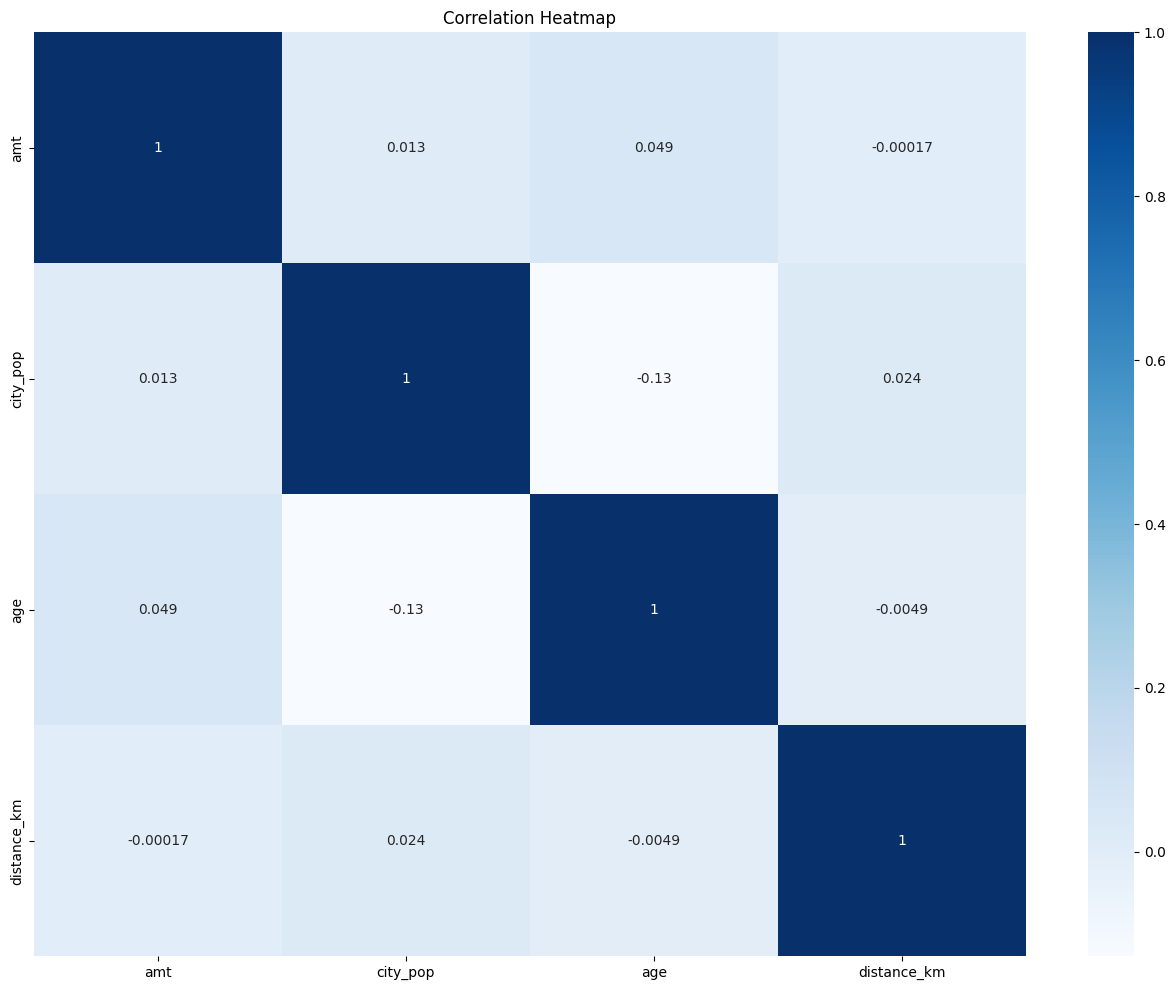

In [20]:
# The correlation matrix shows that the numeric data is not correlated.
quantdata = df[["amt", "city_pop", "age", "distance_km"]]
corr_matrix = quantdata.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
#No NAs in dataset before data modeling.
nan_counts = df.isna().sum()
print(nan_counts)

trans_date_trans_time    0
category                 0
amt                      0
lat                      0
long                     0
city_pop                 0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
time_of_day              0
hour                     0
day_of_week              0
distance_km              0
dtype: int64


### Logistic Regression to Predict Fraud

In [22]:
#Split into Train and Test
train_data, test_data = train_test_split(df, test_size=test_size, random_state=rState) #Test different test sizes. Also made random_state a variable.

In [23]:
#Formula for logistic regression model predictions.
formula = "is_fraud ~ age + amt + hour + category" #Removed state from formula.

#Create and train logistic regression model. 
log_reg = smf.logit(formula = formula, data = train_data).fit(maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.163269
         Iterations 9


In [24]:
#Predict Probabilities
preds = log_reg.predict(test_data)

#Add predictions and agreement columns to the test dataframe.
test_data['prob'] = preds
test_data['prediction'] = np.where(test_data['prob'] > prediction_threshold, 1, 0) #Made prediction_threshold a variable.
test_data['agree'] = np.where(test_data['prediction'] == test_data['is_fraud'], 1, 0)

#Calculate naive accuracy, model accuracy, and AUC.
naive_accuracy = 1 - test_data['is_fraud'].sum() / len(test_data)
accuracy = test_data['agree'].sum() / len(test_data)
auprc = average_precision_score(test_data['is_fraud'], preds)

#Identify Disagreements
disagree = test_data[test_data['agree'] == 0]

#Display Results. Don't round the metrics, as we want to see the full precision of the numbers.
print(f"Naive Accuracy: {naive_accuracy}")
print(f"Model Accuracy: {accuracy}")
print(f"AUPRC: {auprc}")
print(len(test_data))
display(log_reg.summary())

Naive Accuracy: 0.870327641901246
Model Accuracy: 0.949238578680203
AUPRC: 0.8112733614139896
4334


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:                10110
Model:                          Logit   Df Residuals:                    10071
Method:                           MLE   Df Model:                           38
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                  0.5706
Time:                        21:35:20   Log-Likelihood:                -1650.7
converged:                       True   LL-Null:                       -3844.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.7807      0.349    -13.711      0.000      -5.464      -4.097
hour[T.1]                     -0.0189      0.191     -0.099      0.921      -0.394       0.356
hour[T.2]                     -0.1703      0.201     -0.848      0.397      -0.564       0.224
hour[T.3]                     -0.1370      0.196     -0.700      0.484      -0.521       0.247
hour[T.4]                     -2.9908      0.527     -5.677      0.000      -4.023      -1.958
hour[T.5]                     -2.2147      0.374     -5.918      0.000      -2.948      -1.481
hour[T.6]                     -3.1524      0.600     -5.253      0.000      -4.328      -1.976
hour[T.7]                     -2.5998      0.446     -5.832      0.000      -3.474      -1.726
hour[T.8]                     -2.2000      0.375     -5.864      0.000      -2.935      -1.465
hour[T.9]                     -2.1798      0.399     -5.463      0.000      -2.962      -1.398
hour[T.10]                    -2.6448      0.457     -5.792      0.000      -3.540      -1.750
hour[T.11]                    -3.5783      0.643     -5.566      0.000      -4.838      -2.318
hour[T.12]                    -1.5976      0.472     -3.385      0.001      -2.522      -0.673
hour[T.13]                    -1.5099      0.471     -3.208      0.001      -2.432      -0.587
hour[T.14]                    -1.0046      0.415     -2.423      0.015      -1.817      -0.192
hour[T.15]                    -0.9540      0.401     -2.380      0.017      -1.740      -0.168
hour[T.16]                    -1.2751      0.431     -2.959      0.003      -2.120      -0.430
hour[T.17]                    -1.2192      0.417     -2.924      0.003      -2.036      -0.402
hour[T.18]                    -1.7712      0.447     -3.963      0.000      -2.647      -0.895
hour[T.19]                    -1.8487      0.544     -3.397      0.001      -2.915      -0.782
hour[T.20]                    -1.6190      0.467     -3.466      0.001      -2.534      -0.703
hour[T.21]                    -1.8852      0.465     -4.056      0.000      -2.796      -0.974
hour[T.22]                     1.7023      0.253      6.734      0.000       1.207       2.198
hour[T.23]                     1.8187      0.252      7.229      0.000       1.326       2.312
category[T.food_dining]        0.6369      0.325      1.961      0.050       0.000       1.273
category[T.gas_transport]      2.8402      0.320      8.870      0.000       2.213       3.468
category[T.grocery_net]        2.2091      0.392      5.636      0.000       1.441       2.977
category[T.grocery_pos]        2.5909      0.302      8.583      0.000       1.999       3.183
category[T.health_fitness]     0.7095      0.326      2.178      0.029       0.071       1.348
category[T.home]               0.3353      0.304      1.102      0.270      -0.261       0.932
category[T.kids_pets]          0.8685      0.302      2.874      0.004       0.276       1.461
category[T.

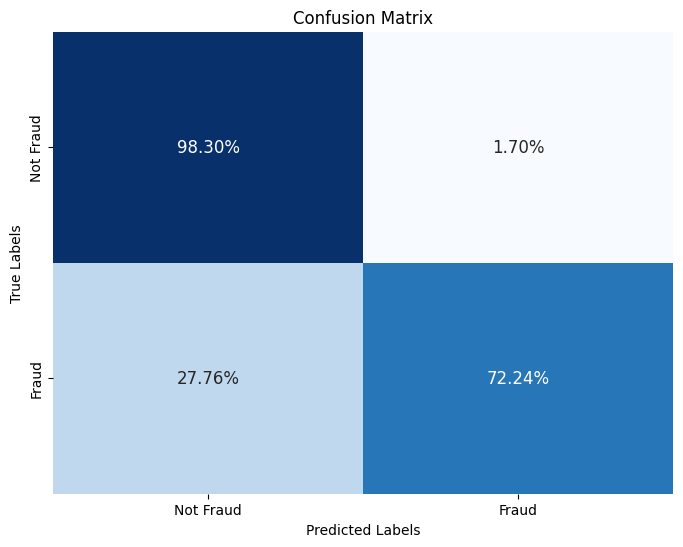

-----------------------------------------------------------------
                    Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3772
           1       0.86      0.72      0.79       562

    accuracy                           0.95      4334
   macro avg       0.91      0.85      0.88      4334
weighted avg       0.95      0.95      0.95      4334



In [25]:
# Compute the confusion matrix
cm = confusion_matrix(test_data['is_fraud'], test_data['prediction'], normalize="true") #Regularized confusion matrix.

# Define labels for the classes
labels = ["Not Fraud", "Fraud"]

#Create confusion matrix plot.
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 12}) #Added precision of two and made it display in percentage.
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print("-" * 65)
print(' ' * 20 + "Classification Report")
print(classification_report(test_data['is_fraud'], test_data['prediction']))

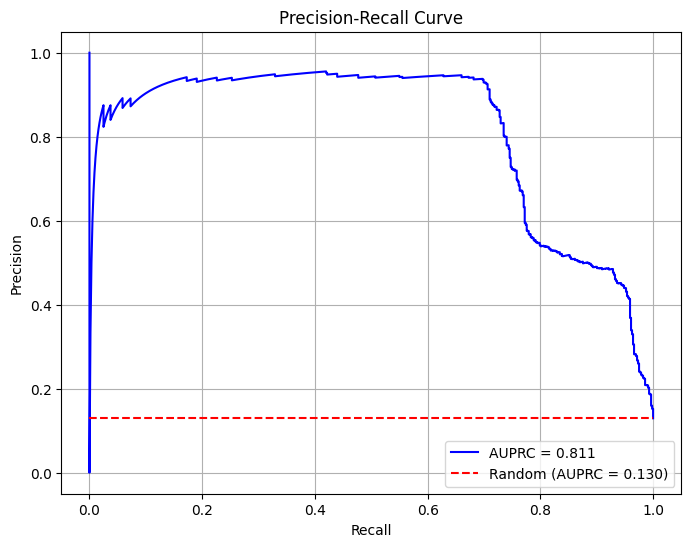

AUPRC: 0.8113


In [26]:
#Plot average precision-recall curve instead of ROC curve.
preds = log_reg.predict(test_data)
y_pred_proba = 1 / (1 + np.exp(-preds))

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(test_data['is_fraud'], y_pred_proba)
# Calculate area under precision-recall curve
auprc = average_precision_score(test_data['is_fraud'], y_pred_proba)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'AUPRC = {auprc:.3f}')

# Add a line for random performance (class imbalance ratio)
no_skill = len(test_data[test_data['is_fraud'] == 1]) / len(test_data)
plt.plot([0, 1], [no_skill, no_skill], 'r--', label=f'Random (AUPRC = {no_skill:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print the AUPRC score in your results section
print(f"AUPRC: {auprc:.4f}")


Learning Curve Analysis for Logistic Regression



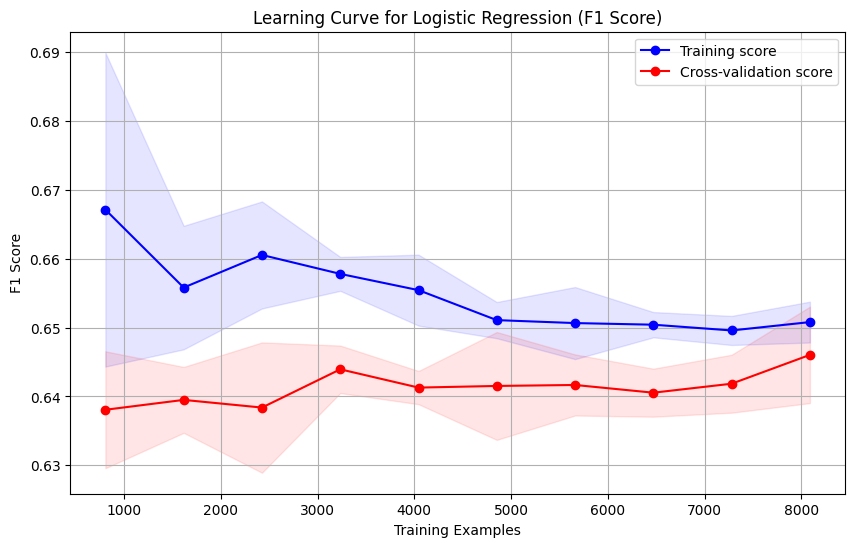

Training examples	Training Score	Validation Score
808		0.6671		0.6381
1617		0.6558		0.6395
2426		0.6606		0.6384
3235		0.6578		0.6439
4044		0.6554		0.6413
4852		0.6511		0.6415
5661		0.6507		0.6417
6470		0.6504		0.6405
7279		0.6496		0.6418
8088		0.6508		0.6460


In [27]:
# Add learning curve analysis - place this after your existing logistic regression code
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

print("\n" + "="*50)
print("Learning Curve Analysis for Logistic Regression")
print("="*50 + "\n")

# Extract the features needed (the same ones used in your formula)
X_features = ['age', 'amt', 'hour', 'category']

# Create a copy of our data for sklearn's model
X_train = train_data[X_features].copy()
y_train = train_data['is_fraud'].copy()

# One-hot encode categorical features
categorical_features = ['hour', 'category']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)

# Initialize the logistic regression model
sklearn_log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Calculate learning curve using F1 score since dataset is imbalanced
train_sizes, train_scores, valid_scores = learning_curve(
    sklearn_log_reg, X_train_encoded, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),  # Train on 10%, 20%, ..., 100% of data
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Using F1 score for imbalanced data
    n_jobs=-1  # Use all available cores
)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Logistic Regression (F1 Score)")
plt.xlabel("Training Examples")
plt.ylabel("F1 Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="red")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="red", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Print numeric results
print("Training examples\tTraining Score\tValidation Score")
for i in range(len(train_sizes)):
    print(f"{train_sizes[i]:.0f}\t\t{train_mean[i]:.4f}\t\t{valid_mean[i]:.4f}")

### Gradient Boosted Random Forest for Fraud Prediction

In [28]:
#creating a new dataframe for the Random Forest
dftree = df[['is_fraud', 'category', 'amt', 'city_pop', 'age', 'hour', 'day_of_week', 'distance_km']].copy() #Removed merchant and professions from list.

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
dftree['category'] = le.fit_transform(dftree['category'])
dftree['day_of_week'] = le.fit_transform(dftree['day_of_week'])
dftree['hour'] = le.fit_transform(dftree['hour'])


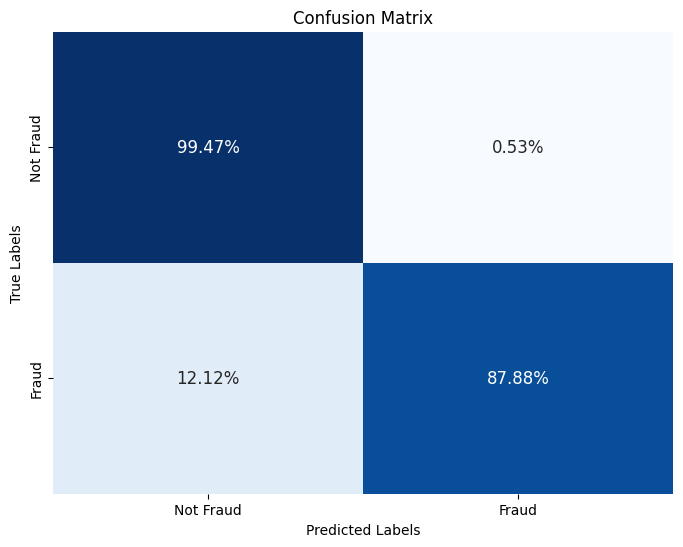

############################################################
                     Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3781
           1       0.96      0.88      0.92       553

    accuracy                           0.98      4334
   macro avg       0.97      0.94      0.95      4334
weighted avg       0.98      0.98      0.98      4334



In [29]:
# Splitting the dataset into train and test sets
X = dftree.drop(columns=['is_fraud'])  # Features
y = dftree['is_fraud']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Random Forest with class weight to handle imbalanced classes
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # For AUC-ROC score


# Compute the confusion matrix
cm1 = confusion_matrix(y_test, y_pred, normalize="true") #Normalized confusion matrix.
# Define labels for the classes
labels = ["Not Fraud", "Fraud"]
plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 12}) #Added precision of two and made it display in percentage.
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("#" * 60)
print(" " * 20, "Classification Report")
print(classification_report(y_test, y_pred))

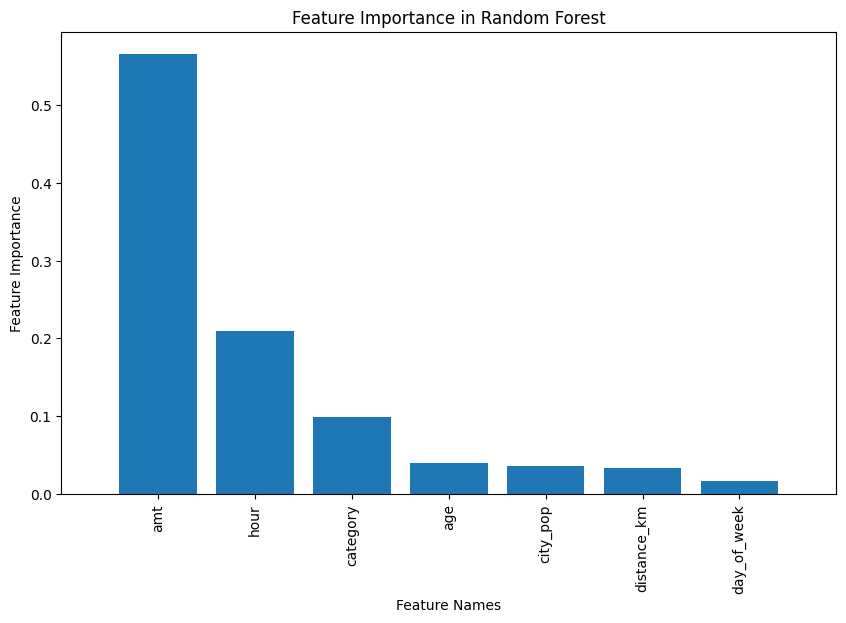

In [30]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.xlabel("Feature Names")
plt.ylabel("Feature Importance") #Come back and rename if needed.
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [31]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


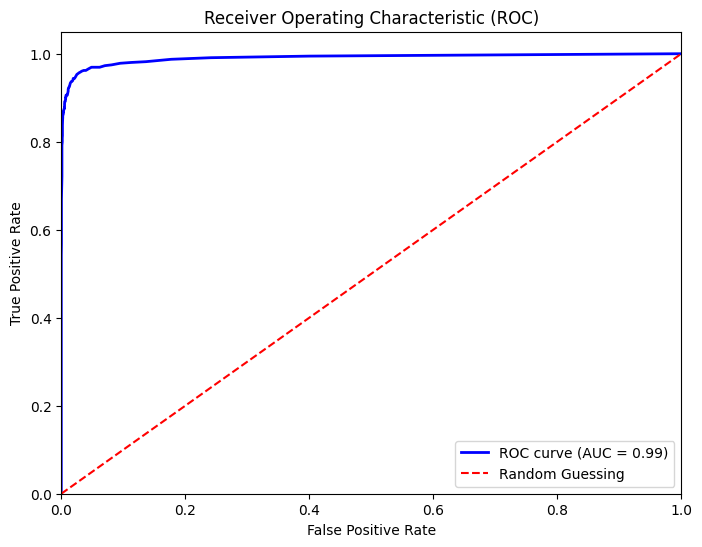

In [32]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [33]:
# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')

# Print each fold's AUC score and the average
print("AUC scores for each fold:", scores)
print("Mean AUC score:", scores.mean())

AUC scores for each fold: [0.99387233 0.98961533 0.99423098 0.98958952 0.98931914]
Mean AUC score: 0.9913254579599797
